In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
environments = ["Ant-v4","HalfCheetah-v4","Hopper-v4","Humanoid-v4","Walker2d-v4"]
#environments = ["Ant-v4","Humanoid-v4"]

policies = ["OurDDPG","TD3","SPG","SPGTD3","SPGTQC","SPGOAC"]
#policies = ["OurDDPG","TD3","SPG","SPGTQC","TQC"]

In [4]:

environment = environments[0]
timesteps = np.arange(0,1e6+5000,5000,dtype=np.int32)

In [5]:
plot_std=True

Mean result in Ant-v4DDPG: 1335.286825918997  std: 301.861607135828
Mean result in Ant-v4TD3 2937.5337055249265  std: 889.8190203076713
Mean result in Ant-v4SPG 1517.1040055187384  std: 87.17017302757061
Mean result in Ant-v4SPGTD3 2142.466942673372  std: 584.6742070811998
Mean result in Ant-v4SPGTQC 2005.96399187315  std: 519.3670216184339
Mean result in Ant-v4SPGOAC 808.5020214928179  std: 218.57986602895267


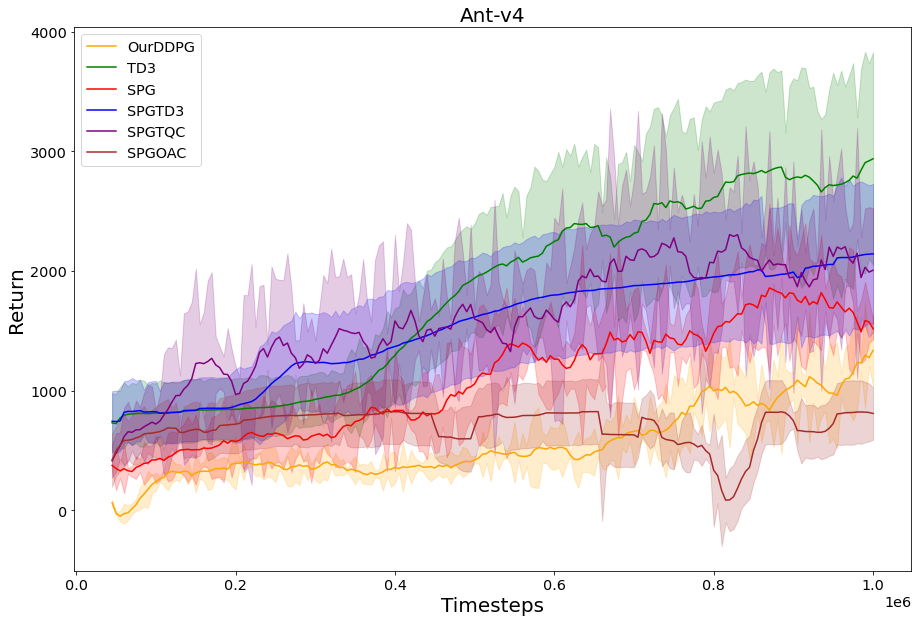

Mean result in HalfCheetah-v4DDPG: 6265.659882236373  std: 1431.1653730231444
Mean result in HalfCheetah-v4TD3 1964.7072299247448  std: 206.9297877283493
Mean result in HalfCheetah-v4SPG 5043.900705971286  std: 1440.21995364528
Mean result in HalfCheetah-v4SPGTD3 5959.840577088967  std: 1698.1656138816966
Mean result in HalfCheetah-v4SPGTQC 10862.856759411374  std: 3013.522710969905
Mean result in HalfCheetah-v4SPGOAC 3475.0876381231915  std: 1092.2586102328198


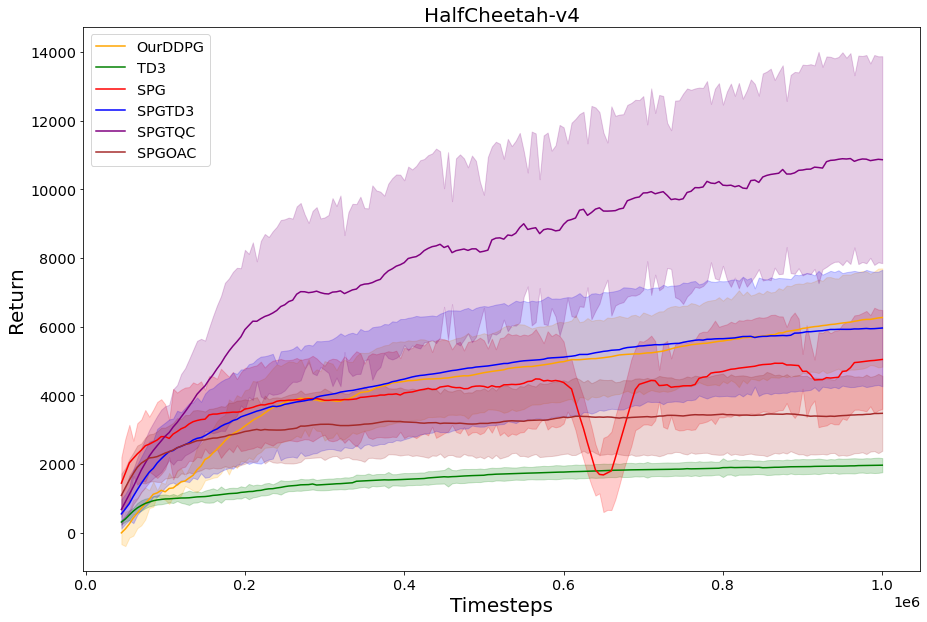

Mean result in Hopper-v4DDPG: 1889.5963952716406  std: 1153.727984373935
Mean result in Hopper-v4TD3 3024.0005348247028  std: 997.2550970983859
Mean result in Hopper-v4SPG 1575.1991305674899  std: 469.3769777250872
Mean result in Hopper-v4SPGTD3 1093.0811078238207  std: 98.04356226162513
Mean result in Hopper-v4SPGTQC 2159.5169719812775  std: 1214.1041821917336
Mean result in Hopper-v4SPGOAC 2350.3797981943253  std: 963.2499503731752


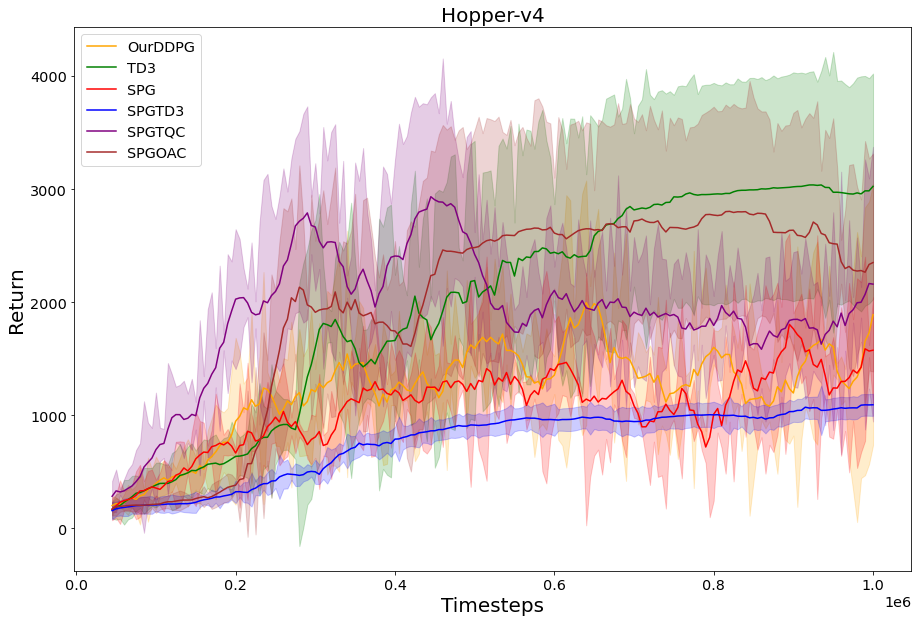

Mean result in Humanoid-v4DDPG: 1939.6295234054003  std: 520.0984061924567
Mean result in Humanoid-v4TD3 200.4725741636652  std: 55.206281443096586
Mean result in Humanoid-v4SPG 2793.877338547706  std: 673.7367995781525
Mean result in Humanoid-v4SPGTD3 3587.7492539016566  std: 1805.2470101055044
Mean result in Humanoid-v4SPGTQC 4615.546341884187  std: 1413.8282090078526
Mean result in Humanoid-v4SPGOAC 209.29447287652164  std: 47.97315227879305


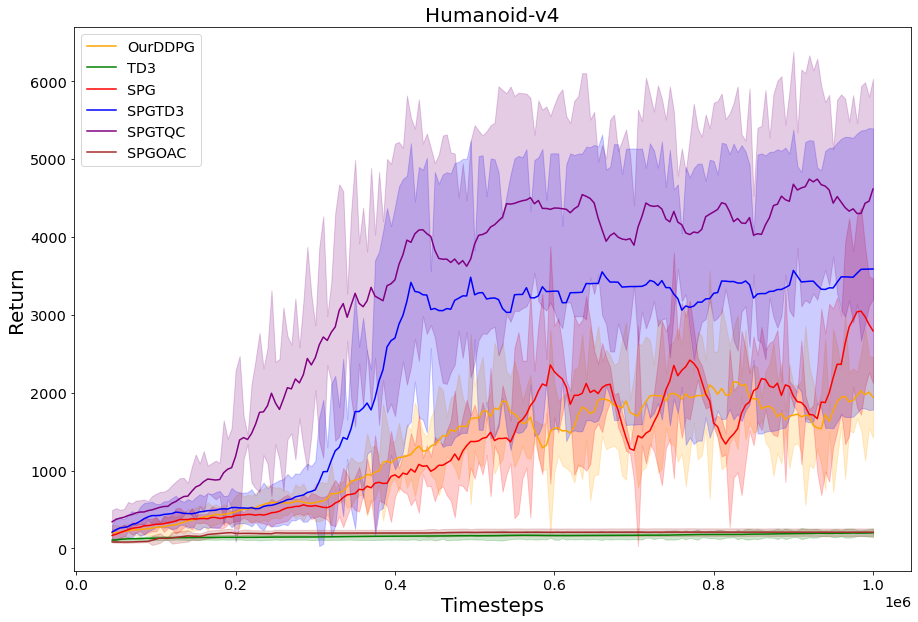

Mean result in Walker2d-v4DDPG: 942.1173099972215  std: 320.01569321259024
Mean result in Walker2d-v4TD3 3322.4074214489037  std: 995.0656458764338
Mean result in Walker2d-v4SPG 1474.186890292775  std: 257.23908812356586
Mean result in Walker2d-v4SPGTD3 3583.8853642674126  std: 981.9757458385252
Mean result in Walker2d-v4SPGTQC 4499.874990310856  std: 1458.0506855026715
Mean result in Walker2d-v4SPGOAC 3615.359307345859  std: 1115.3457938548972


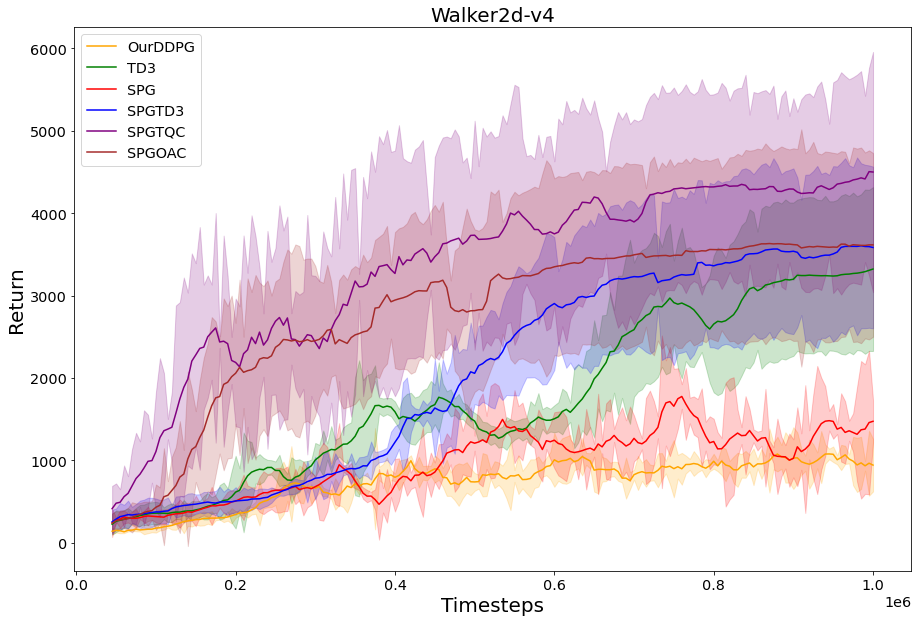

In [6]:
for environment in environments:
    respective_mean_result = []
    respective_std_result = []
    for x in range(len(policies)):
        policy = policies[x]
        dir_path = "results/"+environment+"/"+policy+"/"

        results = []
        for path in os.listdir(dir_path):
            if os.path.isfile(os.path.join(dir_path, path)):
                results.append(path)

        required_result = []
        for result in results:
            if("eval" in result):
                required_result.append(result)

        all_results = pd.DataFrame(columns=["run_0","run_1","run_2","run_3","run_4","mean","std"])

        for i in range(len(required_result)):
            try:
                all_results["run_0"] = np.load(dir_path+required_result[i])
                all_results["run_1"] = np.load(dir_path+required_result[i])
                all_results["run_2"] = np.load(dir_path+required_result[i])
                all_results["run_3"] = np.load(dir_path+required_result[i])
                all_results["run_4"] = np.load(dir_path+required_result[i])
                all_results["mean"] = all_results.mean(axis=1)
                all_results["std"] = all_results.std(axis=1)

            except:
                continue

        filtered_mean = all_results["mean"].rolling(10).mean()
        mean_array = filtered_mean.to_numpy()

        std_array = all_results["std"].to_numpy()
        respective_mean_result.append(mean_array)
        respective_std_result.append(std_array)


    plt.figure(figsize=(15,10))
    plt.title(label=environment,fontsize=20)
    plt.xlabel('Timesteps', fontsize=20)
    plt.ylabel('Return', fontsize=20)
    plt.plot(timesteps,respective_mean_result[0],label = "OurDDPG",color="orange")
    plt.plot(timesteps,respective_mean_result[1],label = "TD3",color="g")
    plt.plot(timesteps,respective_mean_result[2],label = "SPG",color="r")
    plt.plot(timesteps,respective_mean_result[3],label = "SPGTD3",color="b")
    plt.plot(timesteps,respective_mean_result[4],label = "SPGTQC",color="purple")
    plt.plot(timesteps,respective_mean_result[5],label = "SPGOAC",color="brown")
    plt.legend(loc="upper left")

    if(plot_std):
        plt.fill_between(timesteps,
                         respective_mean_result[0] - respective_std_result[0],
                         respective_mean_result[0] + respective_std_result[0],
                        alpha=0.2,color="orange")
        plt.fill_between(timesteps,
                         respective_mean_result[1] - respective_std_result[1],
                         respective_mean_result[1] + respective_std_result[1],
                        alpha=0.2,color="g")
        plt.fill_between(timesteps,
                         respective_mean_result[2] - respective_std_result[2],
                         respective_mean_result[2] + respective_std_result[2],
                        alpha=0.2,color="r")
        plt.fill_between(timesteps,
                         respective_mean_result[3] - respective_std_result[3],
                         respective_mean_result[3] + respective_std_result[3],
                        alpha=0.2,color="b")
        plt.fill_between(timesteps,
                         respective_mean_result[4] - respective_std_result[4],
                         respective_mean_result[4] + respective_std_result[4],
                        alpha=0.2,color="purple")
        plt.fill_between(timesteps,
                         respective_mean_result[5] - respective_std_result[5],
                         respective_mean_result[5] + respective_std_result[5],
                        alpha=0.2,color="brown")
    
    print("Mean result in "+environment+"DDPG:",respective_mean_result[0][-1]," std:",respective_std_result[0][-1])
    print("Mean result in "+environment+"TD3",respective_mean_result[1][-1]," std:",respective_std_result[1][-1])
    print("Mean result in "+environment+"SPG",respective_mean_result[2][-1]," std:",respective_std_result[2][-1])
    print("Mean result in "+environment+"SPGTD3",respective_mean_result[3][-1]," std:",respective_std_result[3][-1])
    print("Mean result in "+environment+"SPGTQC",respective_mean_result[4][-1]," std:",respective_std_result[4][-1])
    print("Mean result in "+environment+"SPGOAC",respective_mean_result[5][-1]," std:",respective_std_result[5][-1])
    #_SPGTD3_SPGTQC
    plt.savefig("Images/SPGOAC_SPG"+environment+".png", bbox_inches='tight')
    plt.show()

In [7]:
respective_mean_result[0][-1]

942.1173099972215

In [36]:
respective_mean_result[1][-1]

3749.589344735149

In [37]:
respective_mean_result[2][-1]

1474.186890292775